# Exercise 14

## Decision Trees and Random Forest

Neben linearen Machine Learning Modellen gibt es viele weitere Klassen. Eine davon sind Decision Trees ("Entscheidungsbäume"). Ein Decision Tree könnte z.B. so aussehen:

In [7]:
def stupid_decision_tree(row):
    if row['learning_time'] < 5:
        if row['tutoring']:
            return False
        else:
            return True
    else:
        return False

def evaluate_decision_tree(decision_tree, data):
    total_predicted_passed = 0
    total_actual_passed = 0
    predicted_passed_actual_passed = 0
    
    for index, row in data.iterrows():
        prediction = decision_tree(row)
        
        actual = row['passed']
        if prediction:
            total_predicted_passed += 1
            
            if actual:
                predicted_passed_actual_passed += 1
                
        if actual:
            total_actual_passed += 1
    
    print(f'Out of the predicted passing students {100 * predicted_passed_actual_passed / total_predicted_passed}% actually passed.')
    print(f'Out of the passing students {100 * predicted_passed_actual_passed / total_actual_passed}% were predicted passing.')

In [8]:
import pandas as pd
exam = pd.read_csv('exam.csv')

evaluate_decision_tree(stupid_decision_tree, exam)

Out of the predicted passing students 52.06611570247934% actually passed.
Out of the passing students 24.90118577075099% were predicted passing.


Der `stupid_decision_tree` überprüft zuerst, ob der Schüler weniger als 5 Stunden gelernt hat. In disem Fall besteht der Schüler falls keine Nachhilfe stattgefunden hat. In allen anderen Fällen besteht der Schüler nicht. Natürlich ist das eine sehr schlechte Logik :). Wie du siehst bestehen "nur" 52% der vorhergesagten Schüler und nur ca. 25% der bestehenden Schülern wurde gefunden.

### Aufgabe 1

Kannst du eine Funktion `smart_decision_tree` schreiben, welche das Bestehen der Prüfung besser vorhersagt? Verwende dann wieder `evaluate_decision_tree` um die Performance zu überprüfen.

In [ ]:
...

### Aufgabe 2

Natürlich gibt es Software welche solche Decision Trees basierend auf gewissen Regeln konstruiert. Wir können das z.B. mit Scikit-Learn machen:

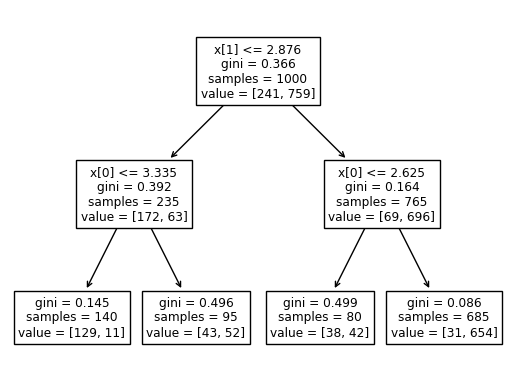

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(exam[['previous_grade', 'learning_time', 'tutoring']], exam['passed'])
tree.plot_tree(clf)
plt.show()

Kannst du dir vorstellen was die Grafik bedeutet?

In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def create_sklearn_decision_tree():
    clf = tree.DecisionTreeClassifier(max_depth=2)
    clf = clf.fit(exam[['previous_grade', 'learning_time', 'tutoring']], exam['passed'])

    def sklearn_decision_tree(row):
        res = clf.predict([row[['previous_grade', 'learning_time', 'tutoring']]])[0]
        return res
    
    return sklearn_decision_tree

sklearn_decision_tree = create_sklearn_decision_tree()
evaluate_decision_tree(sklearn_decision_tree, exam)

Out of the predicted passing students 86.97674418604652% actually passed.
Out of the passing students 98.55072463768116% were predicted passing.


Wie ist die Performance von `smart_decision_tree` im Vergleich zum Decision Tree von Sklearn?

### Aufgabe 3

Wiederhole Aufgabe 2 (ausser `plot_tree`, wird nicht funktioniern), verwende aber den `RandomForestClassifier` von Sklearn. Findest du heraus was ein Random Forest macht? Wie ist die Performance?

In [ ]:
...